### Authors : Kedarkumar Golla, Krishnan Hariharan

# <center>  SENTIMENT ANAYLSIS ON CRICKET COMMENTARY

### OBJECTIVE

Measuring the performance of a cricket player using only statistical analysis will not completely describe how well or how bad he performed ball-by-ball. The objective of this project is to measure the performance of a player (batsman) using Sentiment Analysis on ball-by-ball cricket commentary


In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import text 
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
import nltk
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from matplotlib.pyplot import figure

### 1. DATA AFTER WEB SCRAPING AND LABELLING

In [2]:
#Reading the web scraped and labelled data

data=pd.read_excel(r"C:\Users\KRISH\Desktop\TXT\All_Matches.xlsx")
pd.set_option('display.max_colwidth', -1)
data.head()

,Commentary,Runs,Sentiment
0,no run knocks it down in front of point,0,positive
1,no run rehearses a shot trying to clear the leg-side field but was looking to work it around for a single,0,positive
2,1 run runs that one down towards third man for one more,1,positive
3,1 run drops it into the leg side for a single,1,positive
4,1 run pushed in front of mid-on for a quick single,1,positive


### 2. PRE-PROCESSING THE DATAFRAME

In [3]:
#Creating Class based on the sentiment

data.loc[data["Sentiment"]=="negative","Class"]=0
data.loc[data["Sentiment"]=="positive","Class"]=1
data["Class"]=data["Class"].astype("int")
data.head()

,Commentary,Runs,Sentiment,Class
0,no run knocks it down in front of point,0,positive,1
1,no run rehearses a shot trying to clear the leg-side field but was looking to work it around for a single,0,positive,1
2,1 run runs that one down towards third man for one more,1,positive,1
3,1 run drops it into the leg side for a single,1,positive,1
4,1 run pushed in front of mid-on for a quick single,1,positive,1


In [4]:
data.loc[data["Runs"]=="W","Runs"]=9

def stringToNumbers(Runs):
    if str(Runs).isdigit():
        return Runs
    else:
        for i in Runs:
            if i.isdigit():
                return int(i)

data["Runs"]=data["Runs"].apply(lambda x:stringToNumbers(x))
data.loc[data["Runs"]==9,"Runs"]=-18

In [5]:
data.to_excel("Full_data_Preprocessed_pandas.xlsx")

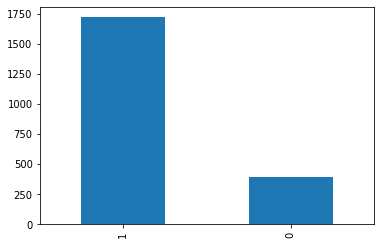

In [6]:
data["Class"].value_counts().plot(kind="bar")

In [7]:
data.head()

,Commentary,Runs,Sentiment,Class
0,no run knocks it down in front of point,0,positive,1
1,no run rehearses a shot trying to clear the leg-side field but was looking to work it around for a single,0,positive,1
2,1 run runs that one down towards third man for one more,1,positive,1
3,1 run drops it into the leg side for a single,1,positive,1
4,1 run pushed in front of mid-on for a quick single,1,positive,1


### 3. PRE-PROCESSING THE COMMENTARY TEXTS

#### a) Removing Names from the commentaries using POS Tagging

In [8]:
def removing_names(sentence):
    tagged_sentence = nltk.tag.pos_tag(sentence.split())
    edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']
    edited_sentence = ' '.join(word for word in edited_sentence)
    return edited_sentence

data["edited_Commentry"]=data["Commentary"].apply(lambda x:removing_names(x))

#### b) Creating problem sepcific Stop-words

In [9]:
all_stopwords = stopwords.words('english')

important_list=['do', 'does', 'did', 'doing','above', 'below', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then','once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very','can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
for i in important_list:
    all_stopwords.remove(i)


#### c) Count Vectorizer

In [12]:
#Tokenize using Count Vectorizer with both Unigrams (n-gram size = 1)and Bigrams (n-gram size = 2)

count_vec_bigram = CountVectorizer(binary=True, stop_words=all_stopwords, ngram_range=(1,2),lowercase=False,min_df=0.01)
count_vec_bigram.fit(data.edited_Commentry)
small_transformed_new = count_vec_bigram.transform(data.edited_Commentry)
print(DataFrame(small_transformed_new.A, columns=count_vec_bigram.get_feature_names()).to_string())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### d) Calculating TF-IDF score

In [13]:
tfidf = TfidfTransformer(use_idf=True)
tfidf.fit(small_transformed_new)
small_tfidfed = tfidf.transform(small_transformed_new)
print(DataFrame(small_tfidfed.A, columns=count_vec_bigram.get_feature_names()).to_string())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 4. MODEL BUILDING FOR CLASSIFICATION

In [14]:
#Logstic Regression Model

lr = LogisticRegression(penalty='l2', C=.8, random_state=21,class_weight='balanced')

In [15]:
#Creating the Pipeline

text_classifier = Pipeline([
    ('vectorizer', CountVectorizer(binary=True, stop_words=all_stopwords, ngram_range=(1,2),lowercase=False,min_df=0.01)),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', lr),
#     ('clf', SGDClassifier()), #by default, this is SVM
])

In [16]:
data.head()

,Commentary,Runs,Sentiment,Class,edited_Commentry
0,no run knocks it down in front of point,0,positive,1,no run knocks it down in front of point
1,no run rehearses a shot trying to clear the leg-side field but was looking to work it around for a single,0,positive,1,no run rehearses a shot trying to clear the leg-side field but was looking to work it around for a single
2,1 run runs that one down towards third man for one more,1,positive,1,1 run runs that one down towards third man for one more
3,1 run drops it into the leg side for a single,1,positive,1,1 run drops it into the leg side for a single
4,1 run pushed in front of mid-on for a quick single,1,positive,1,1 run pushed in front of mid-on for a quick single


In [17]:
#Train-Test-Split

X_train, X_test, y_train, y_test = train_test_split(
     data.edited_Commentry, data.Class, test_size=0.35, random_state=4)

In [18]:
text_classifier.fit(X_train, y_train)

C:\Users\KRISH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=0.01,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['..., penalty='l2', random_state=21,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [19]:
print(X_test[0:4])
print(y_test[0:4])

830     no run blocks this one towards point to end the over                         
1378    no run he stands on his toes and tucks this angled delivery towards midwicket
283     1 run run away between point and cover with an open face                     
570     1 run but sends it racing to third man with a steer                          
Name: edited_Commentry, dtype: object
830     1
1378    1
283     1
570     1
Name: Class, dtype: int32


In [20]:
X_test = X_test.reset_index(drop = True) # drop=True discards the old index
X_test[0:4]

y_test = y_test.reset_index(drop = True)
y_test[0:4]

0    1
1    1
2    1
3    1
Name: Class, dtype: int32

In [21]:
predicted_test = text_classifier.predict(X_test)
predicted_proba_test = text_classifier.predict_proba(X_test)

for i in range(100):
    print("{}, {}, {}, {}".format(X_test[i], predicted_test[i], predicted_proba_test[i], y_test[i]))
    print(predicted_proba_test[i])

no run blocks this one towards point to end the over, 1, [0.49748005 0.50251995], 1
[0.49748005 0.50251995]
no run he stands on his toes and tucks this angled delivery towards midwicket, 1, [0.2072026 0.7927974], 1
[0.2072026 0.7927974]
1 run run away between point and cover with an open face, 1, [0.22275651 0.77724349], 1
[0.22275651 0.77724349]
1 run but sends it racing to third man with a steer, 1, [0.30621573 0.69378427], 1
[0.30621573 0.69378427]
no run gets confidently forward to drive to mid-off., 1, [0.44990916 0.55009084], 1
[0.44990916 0.55009084]
no run the batsman comes forward and drives without much timing straight to cover, 0, [0.50239363 0.49760637], 0
[0.50239363 0.49760637]
1 run worked behind square leg, 1, [0.09290585 0.90709415], 1
[0.09290585 0.90709415]
no run takes this back-of-a-length ball from outside off and jabs it to short midwicket, 1, [0.40623383 0.59376617], 1
[0.40623383 0.59376617]
1 run leg side again with the line and an easy single to square leg, 1

### 5. MODEL EVALUATION

#### a) F1 SCORE and CONFUSION MATRIX

In [22]:
predicted_train = text_classifier.predict(X_train)

y_train = y_train.astype('category')
print(metrics.classification_report(y_train, predicted_train,
    labels=y_train.cat.categories.tolist()))

print(metrics.confusion_matrix(y_train, predicted_train))

predicted_test = text_classifier.predict(X_test)

y_test = y_test.astype('category')
print(metrics.classification_report(y_test, predicted_test,
    labels=y_test.cat.categories.tolist()))

metrics.confusion_matrix(y_test, predicted_test)

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       257
           1       0.97      0.88      0.92      1116

   micro avg       0.88      0.88      0.88      1373
   macro avg       0.80      0.87      0.83      1373
weighted avg       0.90      0.88      0.89      1373

[[222  35]
 [130 986]]
              precision    recall  f1-score   support

           0       0.55      0.80      0.65       137
           1       0.95      0.85      0.90       603

   micro avg       0.84      0.84      0.84       740
   macro avg       0.75      0.82      0.77       740
weighted avg       0.87      0.84      0.85       740



array([[109,  28],
       [ 89, 514]], dtype=int64)

In [23]:
metrics.precision_score(y_test, predicted_test, average='macro') 
metrics.precision_score(y_test, predicted_test, average='micro') 
metrics.precision_score(y_test, predicted_test, average='weighted') 
metrics.recall_score(y_test, predicted_test, average='micro')

0.8418918918918918

#### b) ROC Curve (No-Skill Prediction Vs Logistic Prediction)

In [24]:
# Generate a No skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

#Predict probabilities
lr_probs = pd.DataFrame(text_classifier.predict_proba(X_test),columns={0,1})

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.918


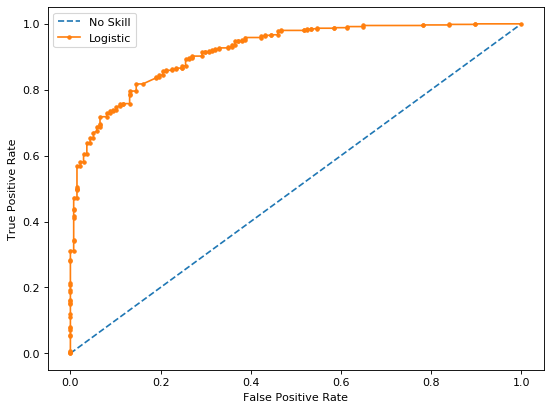

In [25]:
#Keep probabilities for the positive outcome only
lr_probs = lr_probs.iloc[:, 1]

#Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

#Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

#Plot the roc curve for the model

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

#Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

#Show the legend
pyplot.legend()

#Show the plot
pyplot.show()

### 6. PLAYER COMPARISON

### Who is the best opener for Indian team for home matches?

###  KL RAHUL vs ROHIT SHARMA vs SHIKHAR DHAWAN

In [26]:
#Creating the whole pipeline

def preprocess(filename,sheetname):
    data=pd.read_excel(filename,sheet_name=sheetname)
    data["edited_Commentry"]=data["Commentary"].apply(lambda x:removing_names(x))
    all_stopwords = stopwords.words('english')

    important_list=['do', 'does', 'did', 'doing','above', 'below', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then','once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very','can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    for i in important_list:
        all_stopwords.remove(i)
    predicted_test = text_classifier.predict(data.edited_Commentry)
    predicted_proba_test = text_classifier.predict_proba(data.edited_Commentry)
    
    
    input_data={"edited_Commentry":data.edited_Commentry,"predicted_class":predicted_test}
    final_df=pd.DataFrame(input_data)
    #return len(data.edited_Commentry),len(predicted_test),len(predicted_proba_test)
    counts=final_df["predicted_class"].value_counts()
    
    
    #Create a comparison metric (Sentiment Score) for comparison of both the players
    
    positive_decisions=counts[1]
    negitive_decisions=counts[0]
    total_balls=positive_decisions+negitive_decisions
    sentiment_score_for_the_match=(positive_decisions/negitive_decisions)*total_balls
    return round(sentiment_score_for_the_match,2)

## KL RAHUL

### ANALYSING PERFORMANCE OF KL RAHUL IN LAST 5 INNINGS IN INDIA AS OPENER

In [27]:
Rahul_score_RR1=preprocess(r"C:\Users\KRISH\Desktop\TXT\RR_ALL.xlsx","RR1RA")
Rahul_score_RR2=preprocess(r"C:\Users\KRISH\Desktop\TXT\RR_ALL.xlsx","RR2RA")
Rahul_score_RR3=preprocess(r"C:\Users\KRISH\Desktop\TXT\RR_ALL.xlsx","RR3RA")
Rahul_score_RR4=preprocess(r"C:\Users\KRISH\Desktop\TXT\RR_ALL.xlsx","RR4RA")
Rahul_score_RR5=preprocess(r"C:\Users\KRISH\Desktop\TXT\RR_ALL.xlsx","RR5RA")

In [28]:
# Sentimental Score of KL RAHUL in the last 5 Innings he played in India as Opener

Rahul_scores=[Rahul_score_RR1,Rahul_score_RR2,Rahul_score_RR3,Rahul_score_RR4,Rahul_score_RR5]
print("KL Rahul Scores in the last 5 innings in India  :\n\n",Rahul_scores)
Rahul_mean_score=round(np.mean(Rahul_scores),2)
print("\nMean : ",Rahul_mean_score)
Rahul_median_score=np.median(Rahul_scores)
print("Median : ",Rahul_median_score)
std_Rahul_score=round(np.std(Rahul_scores),2)
print("Standard Deviation : ",std_Rahul_score)
print("Coefficient of Variation : ",std_Rahul_score/Rahul_mean_score)

KL Rahul Scores in the last 5 innings in India  :

 [84.0, 26.67, 280.32, 533.08, 8.12]

Mean :  186.44
Median :  84.0
Standard Deviation :  198.39
Coefficient of Variation :  1.0640956876206822


## ROHIT SHARMA

### ANALYSING PERFORMANCE OF ROHIT SHARMA IN LAST 5 INNINGS IN INDIA AS OPENER

In [29]:
rohit_score_RR1=preprocess(r"C:\Users\KRISH\Desktop\TXT\RR_ALL.xlsx","RR1RS")
rohit_score_RS2=preprocess(r"C:\Users\KRISH\Desktop\TXT\RS_ALL.xlsx","RohitRsd2")
rohit_score_RS1=preprocess(r"C:\Users\KRISH\Desktop\TXT\RS_ALL.xlsx","RohitRSD1")
rohit_score_RR4=preprocess(r"C:\Users\KRISH\Desktop\TXT\RR_ALL.xlsx","RR4RS")
rohit_score_RR3=preprocess(r"C:\Users\KRISH\Desktop\TXT\RR_ALL.xlsx","RR3RS")

In [30]:
# Sentimental Score of ROHIT SHARMA in the last 5 Innings he played in India as Opener

Rohit_scores=[rohit_score_RR1,rohit_score_RS2,rohit_score_RS1,rohit_score_RR4,rohit_score_RR3]
print("Rohit Sharma Scores in the last 5 innings in India  :\n\n ",Rohit_scores)
Rohit_mean_score=round(np.mean(Rohit_scores),2)
print("\nMean : ",Rohit_mean_score)
Rohit_median_score=np.median(Rohit_scores)
print("Median : ",Rohit_median_score)
std_Rohit_score=round(np.std(Rohit_scores),2)
print("Standard Deviation : ",std_Rohit_score)
print("Coefficient of Variation: ",round((std_Rohit_score/Rohit_mean_score),2))

Rohit Sharma Scores in the last 5 innings in India  :

  [487.33, 116.77, 26.67, 433.12, 443.74]

Mean :  301.53
Median :  433.12
Standard Deviation :  190.65
Coefficient of Variation:  0.63


## SHIKHAR DHAWAN

 ### ANALYSING PERFORMANCE OF SHIKHAR DHWAN IN LAST 5 INNINGS IN INDIA AS OPENER

In [31]:
Shikar_score_RS1=preprocess(r"C:\Users\KRISH\Desktop\TXT\RS_ALL.xlsx","ShikarRsd1")
Shikar_score_RS2=preprocess(r"C:\Users\KRISH\Desktop\TXT\RS_ALL.xlsx","ShikarRSD2")
Shikar_score_RS3=preprocess(r"C:\Users\KRISH\Desktop\TXT\RS_ALL.xlsx","SikharRSD3")
Shikar_score_RS4=preprocess(r"C:\Users\KRISH\Desktop\TXT\RS_ALL.xlsx","SIkharRSD4")
Shikar_score_RS5=preprocess(r"C:\Users\KRISH\Desktop\TXT\RS_ALL.xlsx","ShikarRSD5")

In [32]:
# Sentimental Score of SHIKHAR DHAWAN in the last 5 Innings he played in India as Opener

Shikar_scores=[Shikar_score_RS1,Shikar_score_RS2,Shikar_score_RS3,Shikar_score_RS4,Shikar_score_RS5]
print("Shikhar Dhawan Scores in the last 5 innings in India  :\n\n",Shikar_scores)
Shikar_mean_score=round(np.mean(Shikar_scores),2)
print("\nMean : ",Shikar_mean_score)
Shikar_median_score=np.median(Shikar_scores)
print("Median : ",Shikar_median_score)
std_Shikar_score=round(np.std(Shikar_scores),2)
print("Standard Deviation : ",std_Shikar_score)
print("Coefficient of Variation : ",std_Shikar_score/Shikar_mean_score)

Shikhar Dhawan Scores in the last 5 innings in India  :

 [378.22, 396.12, 22.5, 505.23, 40.0]

Mean :  268.41
Median :  378.22
Standard Deviation :  198.54
Coefficient of Variation :  0.7396892813233485


### 7. INFERENCE

### Coefficient of Variation of Sentiment  scores of players :
 
### KL RAHUL			 	         : 		   1.06
### SHIKHAR DHAWAN		    : 		  0.74
### ROHIT SHARMA			   :		  0.63

### By comparing the Coefficient of variation of Sentiment  scores of the players, we can infer that ROHIT SHARMA is the best opener among the three and SHIKHAR DHAWAN is a better opener than KL RAHUL for Indian team to play ODI matches in India.
